In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
np.set_printoptions(suppress=True)

In [3]:
data = pd.read_csv('./Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#Rearranging the columns

In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
data = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
'parking', 'prefarea', 'furnishingstatus', 'price']]

In [7]:
data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [8]:
data.shape

(545, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
data.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [11]:
data.isnull().mean()*100

area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
price               0.0
dtype: float64

In [12]:
#Univariate analysis

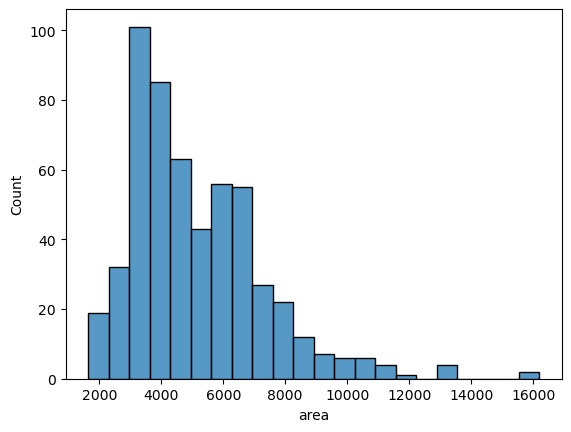

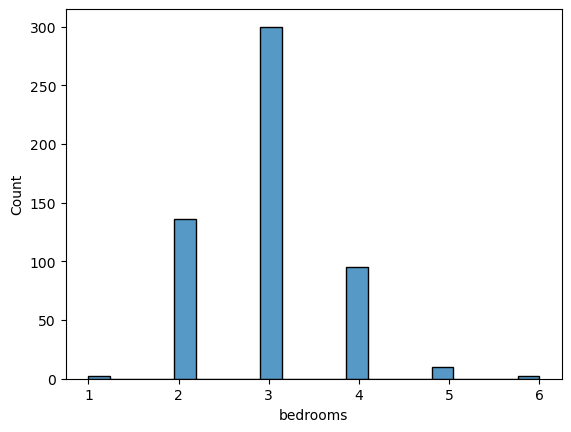

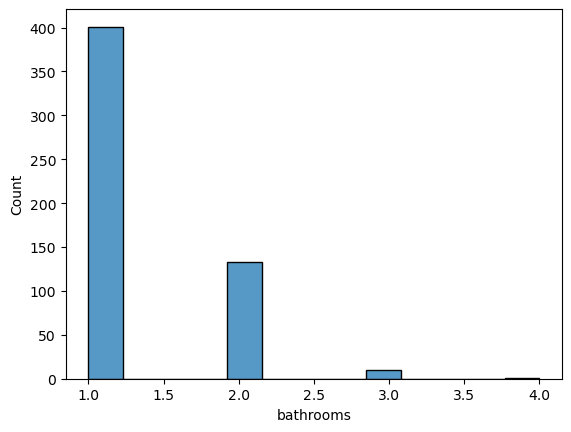

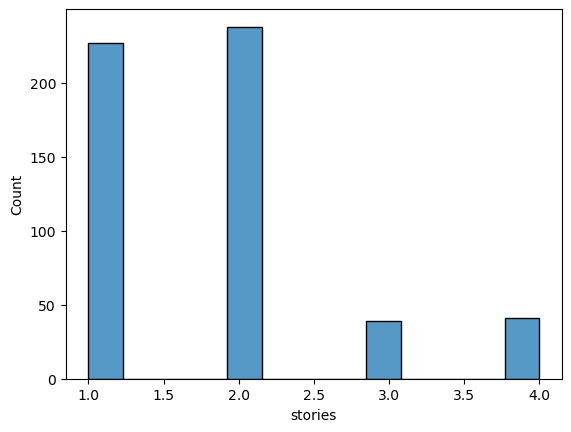

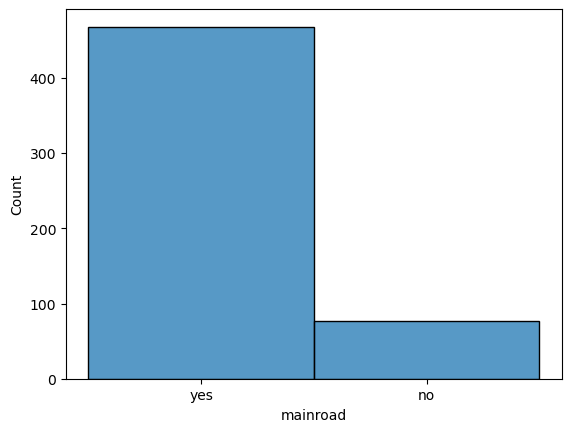

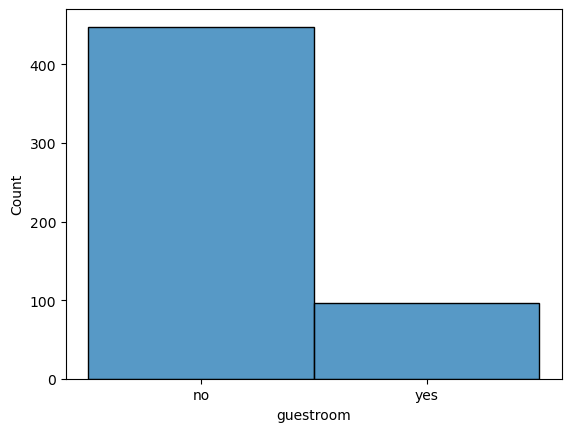

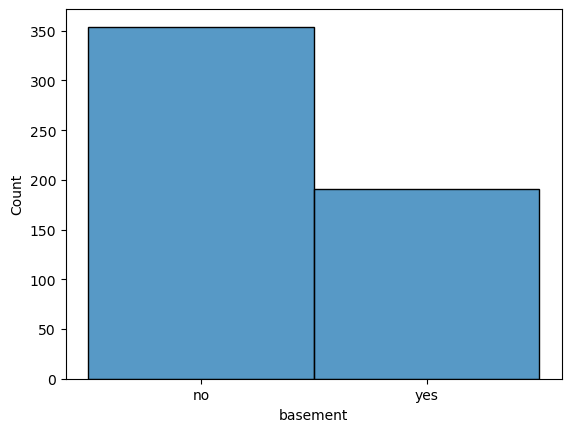

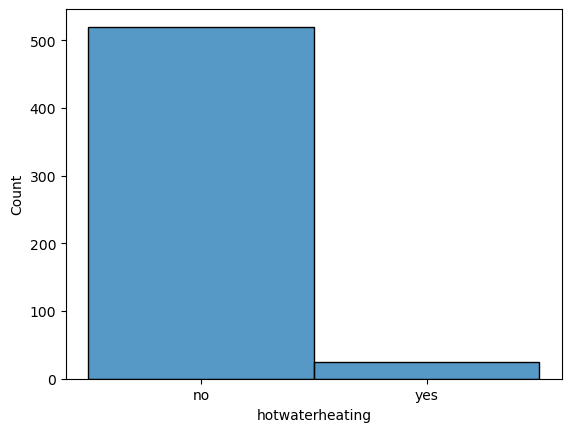

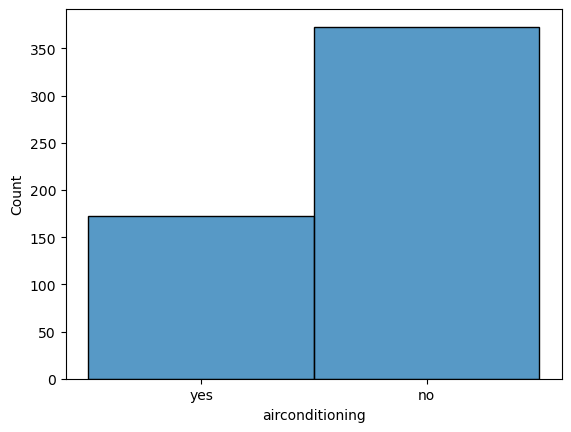

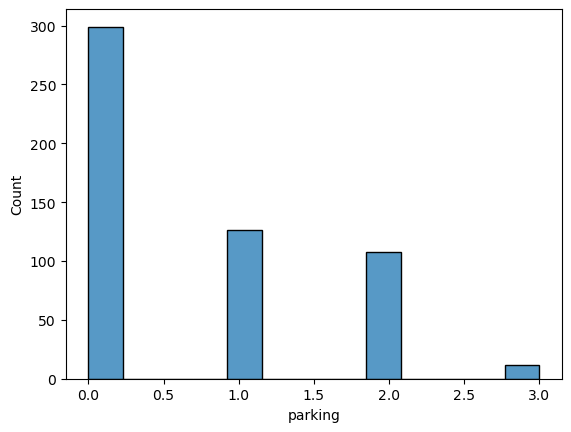

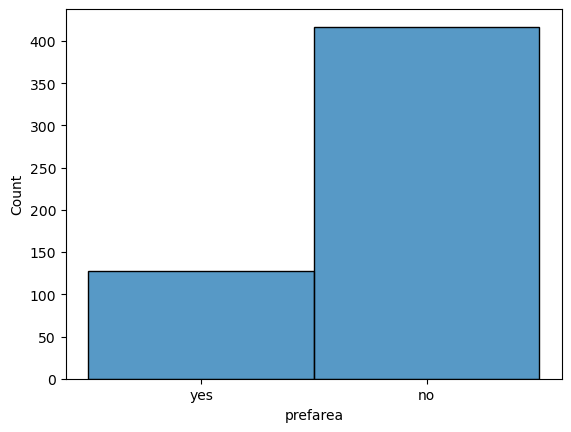

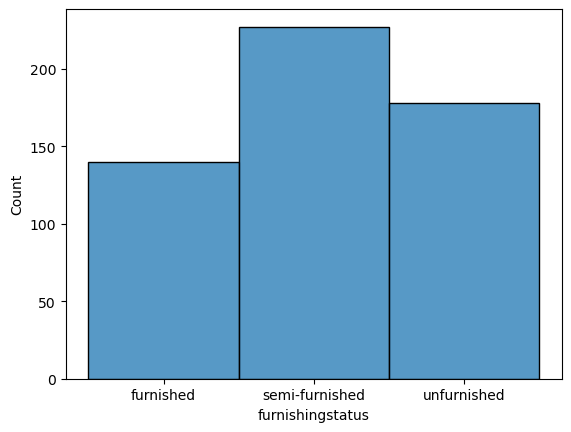

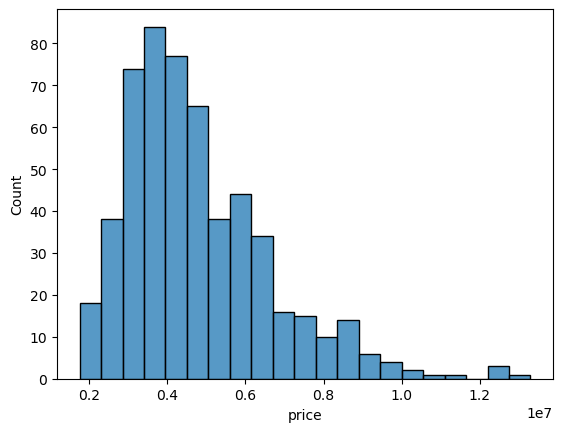

In [13]:
for i in data.columns:
    sns.histplot(x=data[i])
    plt.show();

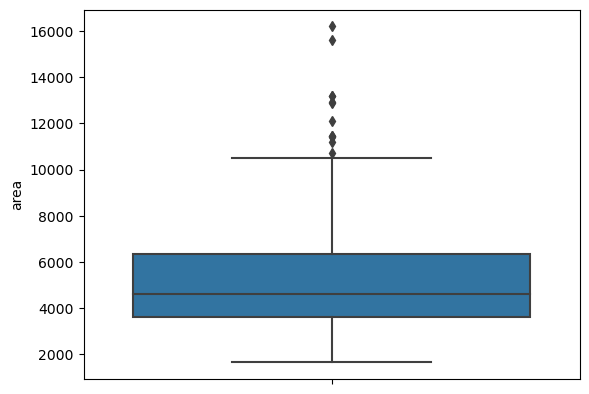

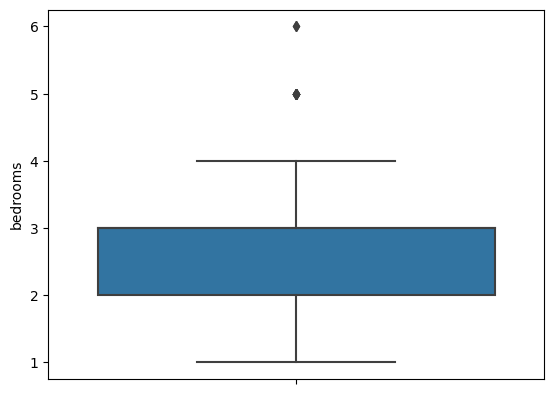

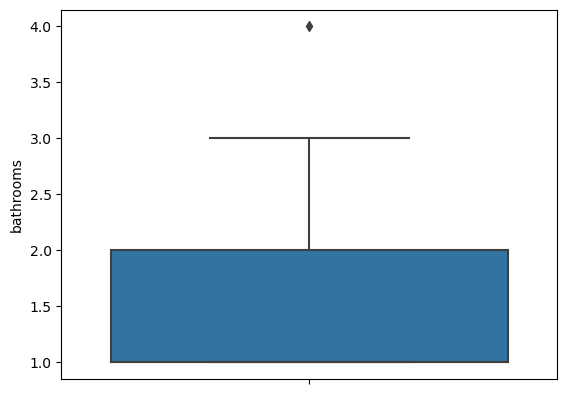

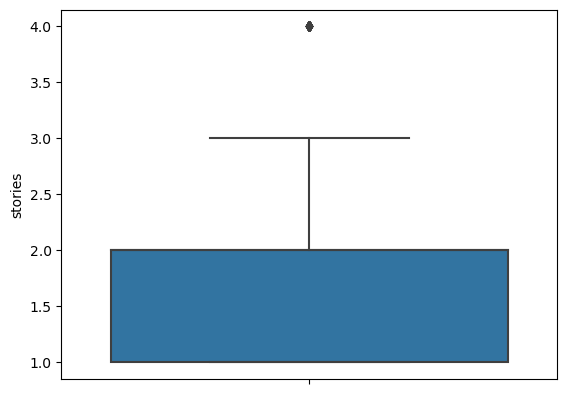

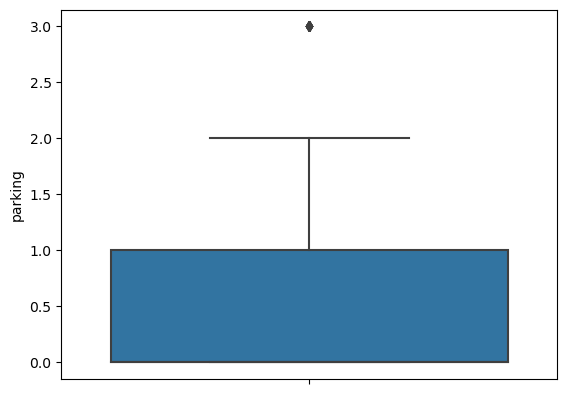

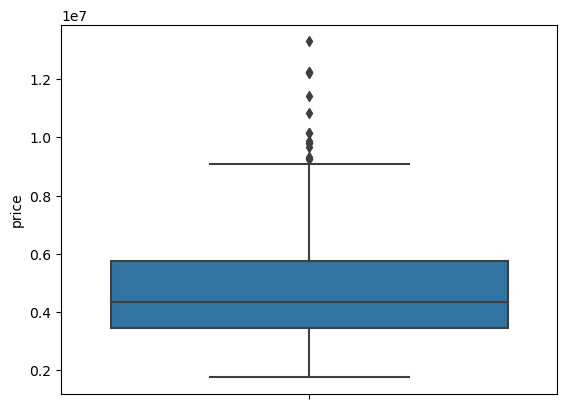

In [14]:
for i in data.columns:

    if data[i].dtypes != 'object':
        sns.boxplot(y=data[i])
        plt.show();

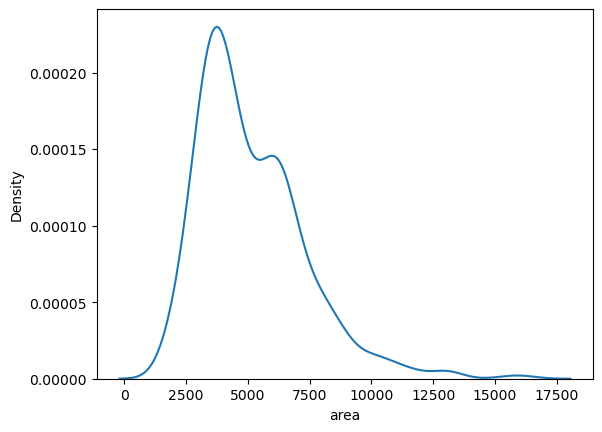

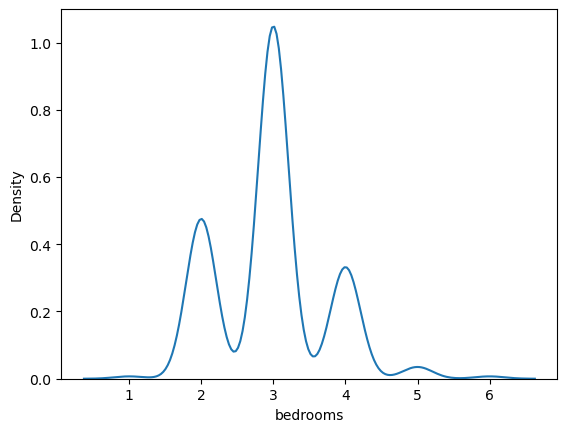

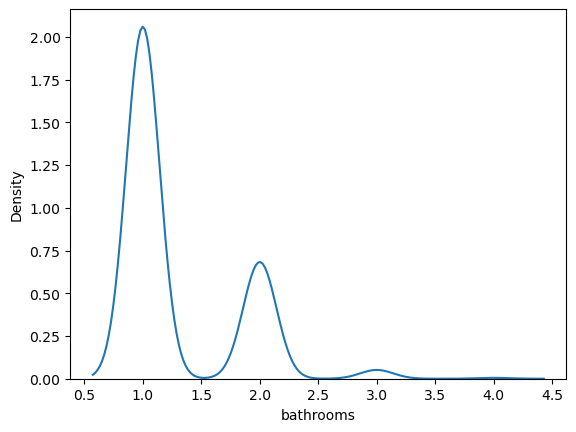

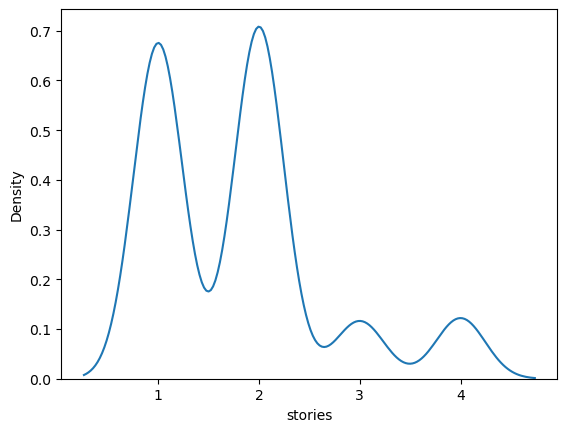

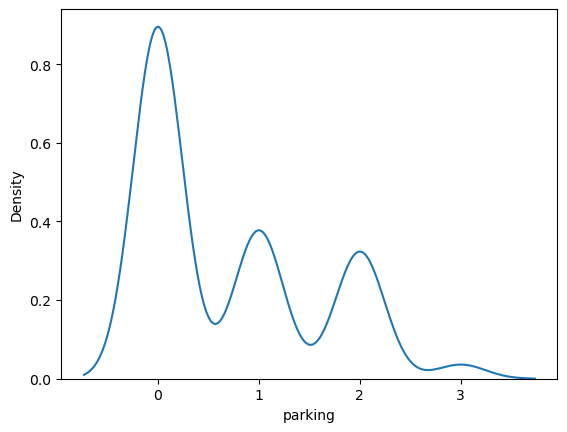

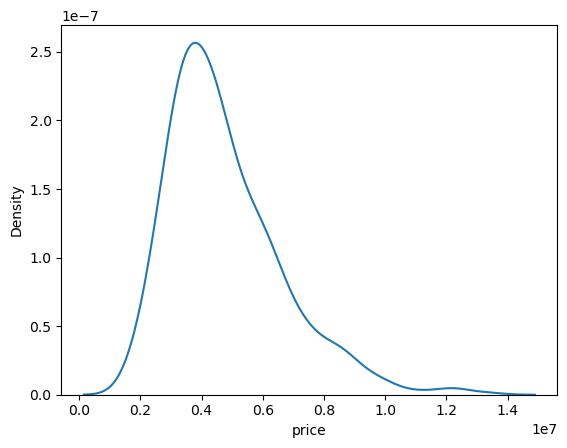

In [16]:
for i in data.columns:

    if data[i].dtypes != 'object':
        sns.kdeplot(x=data[i])
        plt.show();

In [17]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [18]:
UL, LL = outlier_limit(data['price'])
data['price'] = np.where((data['price']>UL) | (data['price']<LL),np.nan,data['price'])

In [19]:
data.dropna(inplace=True)

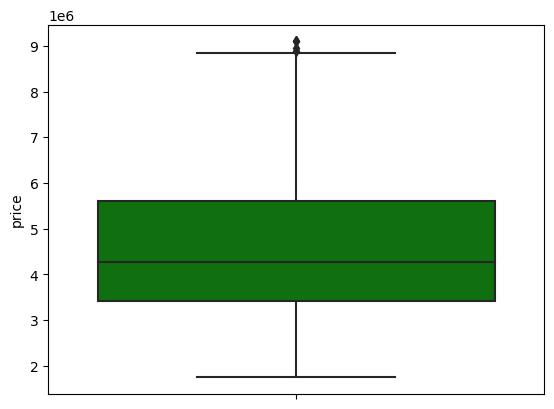

In [20]:
sns.boxplot(y=data['price'], color="Green")
plt.show()

In [21]:
#Label encoding the categorical columns

In [22]:
le = LabelEncoder()

In [23]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])

In [24]:
data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
15,6000,4,1,2,1,0,1,0,0,2,0,1,9100000.0
16,6600,4,2,2,1,1,1,0,1,1,1,2,9100000.0
17,8500,3,2,4,1,0,0,0,1,2,0,0,8960000.0
18,4600,3,2,2,1,1,0,0,1,2,0,0,8890000.0
19,6420,3,2,2,1,0,0,0,1,1,1,1,8855000.0


In [25]:
#Correlation

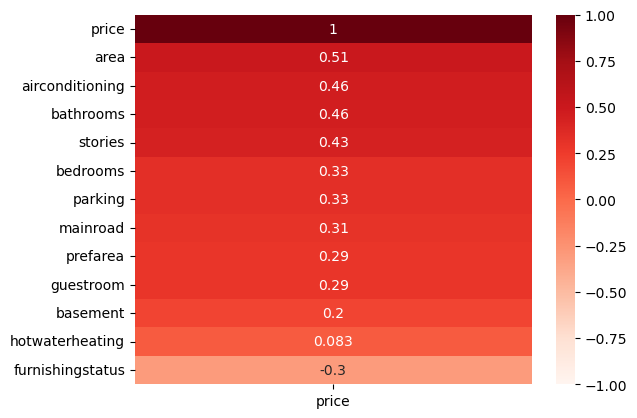

In [26]:
sns.heatmap(data.corr()[["price"]].sort_values(by="price", ascending=False),
vmin=-1, vmax=1,annot=True, cmap="Reds");

In [27]:
#Splitting the data into x & y

In [28]:
x = data.iloc[:,:-1].values

In [29]:
y = data.iloc[:, -1].values

In [30]:
x

array([[6000,    4,    1, ...,    2,    0,    1],
       [6600,    4,    2, ...,    1,    1,    2],
       [8500,    3,    2, ...,    2,    0,    0],
       ...,
       [3620,    2,    1, ...,    0,    0,    2],
       [2910,    3,    1, ...,    0,    0,    0],
       [3850,    3,    1, ...,    0,    0,    2]], dtype=int64)

In [31]:
y

array([9100000., 9100000., 8960000., 8890000., 8855000., 8750000.,
       8680000., 8645000., 8645000., 8575000., 8540000., 8463000.,
       8400000., 8400000., 8400000., 8400000., 8400000., 8295000.,
       8190000., 8120000., 8080940., 8043000., 7980000., 7962500.,
       7910000., 7875000., 7840000., 7700000., 7700000., 7560000.,
       7560000., 7525000., 7490000., 7455000., 7420000., 7420000.,
       7420000., 7350000., 7350000., 7350000., 7350000., 7343000.,
       7245000., 7210000., 7210000., 7140000., 7070000., 7070000.,
       7035000., 7000000., 6930000., 6930000., 6895000., 6860000.,
       6790000., 6790000., 6755000., 6720000., 6685000., 6650000.,
       6650000., 6650000., 6650000., 6650000., 6650000., 6629000.,
       6615000., 6615000., 6580000., 6510000., 6510000., 6510000.,
       6475000., 6475000., 6440000., 6440000., 6419000., 6405000.,
       6300000., 6300000., 6300000., 6300000., 6300000., 6293000.,
       6265000., 6230000., 6230000., 6195000., 6195000., 61950

In [32]:
#Scaling the data

In [33]:
sc = StandardScaler()

In [34]:
x = sc.fit_transform(x)

In [35]:
#Splitting the data into training and testing data

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, shuffle=True)

In [37]:
x_train.shape

(424, 12)

In [38]:
x_test.shape

(106, 12)

In [39]:
#Model building

In [40]:
model = LinearRegression()

In [41]:
model.fit(x_train, y_train)

LinearRegression()

In [42]:
#Predicting

In [43]:
y_pred = model.predict(x_test)

In [44]:
#Visualizing the results

In [45]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,5530000.0,5.879512e+06
1,3430000.0,4.783756e+06
2,8680000.0,6.308651e+06
3,3780000.0,3.805685e+06
4,3920000.0,4.515974e+06


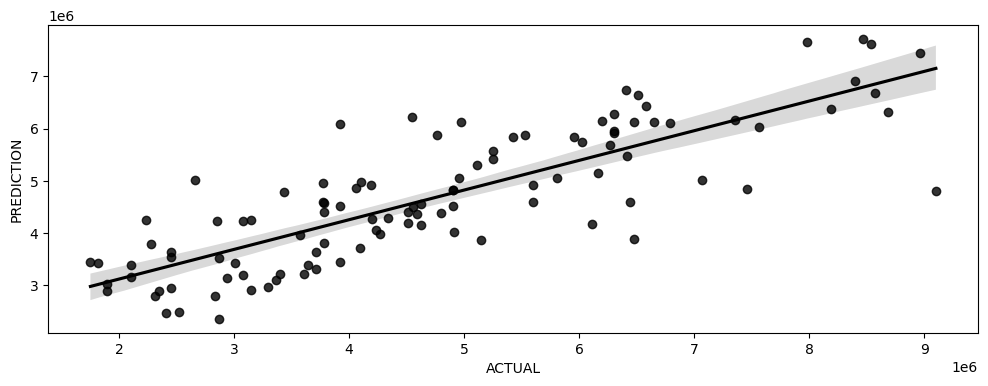

In [46]:
plt.figure(figsize=(12, 4))
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION', color = 'black')
plt.show()

In [47]:
#Evaluating the model

In [48]:
r2_score(y_test, y_pred)

0.6609158761625455

In [49]:
#Training score

In [50]:
model.score(x_train, y_train)

0.6581558484033723

In [51]:
#Testing score

In [52]:
model.score(x_test, y_test)

0.6609158761625455

In [53]:
mean_squared_error(y_test, y_pred)

1174119441578.17

In [55]:
#Lets choose the other models

In [56]:
RFR = RandomForestRegressor(random_state=42)

In [57]:
RFR.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
y_pred_RFR = RFR.predict(x_test)

In [59]:
OUTPUT_RFR = pd.DataFrame(zip(y_test, y_pred_RFR),
columns=['ACTUAL', 'PREDICTION'],
dtype=float)
OUTPUT_RFR.head()

,ACTUAL,PREDICTION
0,5530000.0,6481755.0
1,3430000.0,3580850.0
2,8680000.0,7264705.0
3,3780000.0,4174100.0
4,3920000.0,3472591.5


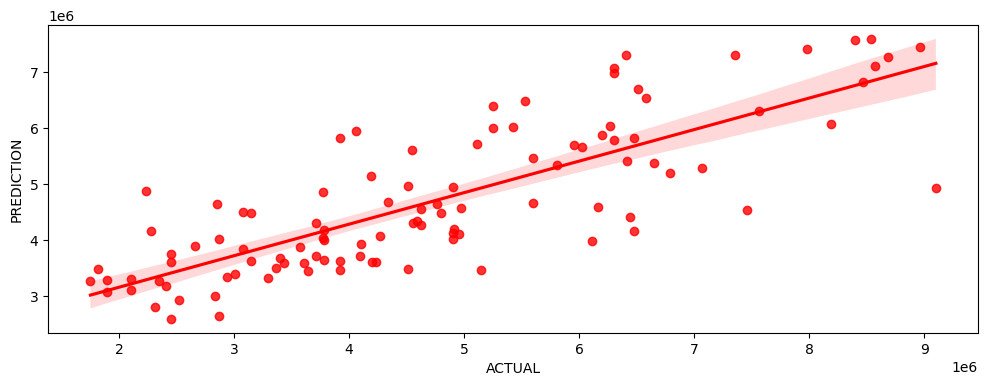

In [60]:
plt.figure(figsize=(12, 4))
sns.regplot(data=OUTPUT_RFR, x='ACTUAL', y='PREDICTION', color = 'red')
plt.show()

In [61]:
r2_score(y_test, y_pred_RFR)

0.6381655757276601

In [62]:
#Training score

In [63]:
RFR.score(x_train, y_train)

0.9474912944354298

In [64]:
#Testing score

In [65]:
RFR.score(x_test, y_test)

0.6381655757276601

In [66]:
mean_squared_error(y_test, y_pred_RFR)

1252895085038.1033

In [67]:
#Training multiple models at same time

In [68]:
models = {
"LinearRegression": LinearRegression(),
"Ridge":Ridge(),
"LinearSVR":LinearSVR(),
"DecisionTreeRegressor":DecisionTreeRegressor(),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=30),
"AdaBoostRegressor":AdaBoostRegressor(random_state=30),
"RandomForestRegressor":RandomForestRegressor(random_state=30),
}

In [70]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  66.09158761625456
training_score:  65.81558484033722
testing_score:  66.09158761625456
mae:  795234.4178837644
mse:  1174119441578.17
rmse_test:  1083567.9219957418
****************************************************************************************************
model trained with Ridge
r2score:  66.06924844016102
training_score:  65.81547068669371
testing_score:  66.06924844016102
mae:  795490.0961593093
mse:  1174892962339.4316
rmse_test:  1083924.7955183198
****************************************************************************************************
model trained with LinearSVR
r2score:  -646.9865631346248
training_score:  -903.9795755916246
testing_score:  -646.9865631346248
mae:  4733141.578682408
mse:  25865305530920.434
rmse_test:  5085794.4837478865
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  45.724270918684255
train